In [1]:

import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen,Request
url = "https://www.x-rates.com/table/?from=INR&amount=1"

In [2]:
request = Request(url)
response = urlopen(request)
html = response.read()
html_soup = BeautifulSoup(html , 'html.parser')
   

In [7]:
#Creating DataFrame uing WebData
INR=[]
IINR=[]
Currency=[]
Rates=html_soup.find_all('td')
count=30
len1=len(Rates)//3
for rate in range(0,len1-10):
    con_=Rates[count].text.strip()
    #print(con_)
    Currency.append(con_)
    
    '''if len(con_)==3:
        Country.append(con_[0]+con_[1])
        Currency.append(con_[2])
    elif len(con_)==2:
        Country.append(con_[0])
        Currency.append(con_[1])
    else:
        Country.append(con_[0])
        Currency.append(con_[0])'''
    
    count+=1
    INR_=Rates[count].text
    INR.append(INR_)
    count+=1
    IINR_=Rates[count].text
    count=count+1
    IINR.append(IINR_)
Rupee=pd.DataFrame({'CurrencyName':Currency,'1.00 INR':INR,'inv 1 INR':IINR})
#print(Rupee)
    


In [23]:
print(Rupee.head())

        CurrencyName  1.00 INR   inv 1 INR
0     Argentine Peso  0.831549    1.202574
1  Australian Dollar  0.020475   48.839306
2     Bahraini Dinar  0.005249  190.519035
3      Botswana Pula  0.152697    6.548899
4     Brazilian Real  0.058577   17.071445


In [13]:
RUP=pd.DataFrame({'CurrencyName':Rupee['CurrencyName'],'1.00 INR':Rupee['1.00 INR']})
RUP['1.00 INR']=RUP['1.00 INR'].astype(float)

RUP.sort_values(by='1.00 INR',inplace=True,ascending=False)
RUP=RUP.head(25)
IRUP=pd.DataFrame({'CurrencyName':Rupee['CurrencyName'],'inv 1 INR':Rupee['inv 1 INR']})
IRUP['inv 1 INR']=IRUP['inv 1 INR'].astype(float)

IRUP.sort_values(by='inv 1 INR',inplace=True,ascending=False)
IRUP=IRUP.head(25)


In [19]:
#Top 10 countries where rupee value is more
print(RUP.head(10))

         CurrencyName    1.00 INR
19       Iranian Rial  586.586726
18  Indonesian Rupiah  196.231615
10     Colombian Peso   47.831263
23   South Korean Won   16.243861
8        Chilean Peso   10.824343
22  Kazakhstani Tenge    5.428276
16   Hungarian Forint    4.227420
42   Sri Lankan Rupee    2.515940
33    Pakistani Rupee    2.170805
17    Icelandic Krona    1.716465


In [20]:
#Top 10 countries where rupee value is less
print(IRUP.head(10))

        CurrencyName   inv 1 INR
24     Kuwaiti Dinar  235.858776
2     Bahraini Dinar  190.519035
32        Omani Rial  186.307301
50     British Pound   92.429687
14              Euro   79.189221
44       Swiss Franc   72.383947
51         US Dollar   71.635157
7    Canadian Dollar   54.173158
5    Bruneian Dollar   52.658916
40  Singapore Dollar   52.658916


In [14]:
import matplotlib.pyplot as plt

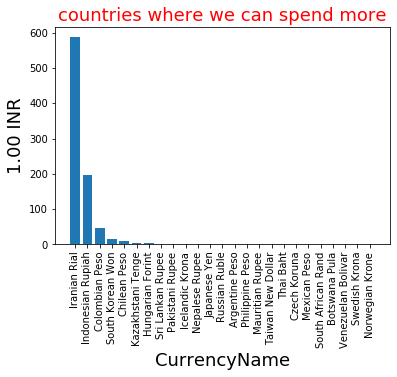

In [21]:
x=RUP['CurrencyName']
y=RUP['1.00 INR']
plt.bar(x, y)
plt.title('countries where we can spend more',fontsize=18,color='red')
plt.xlabel('CurrencyName',fontsize=18)
plt.ylabel('1.00 INR',fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

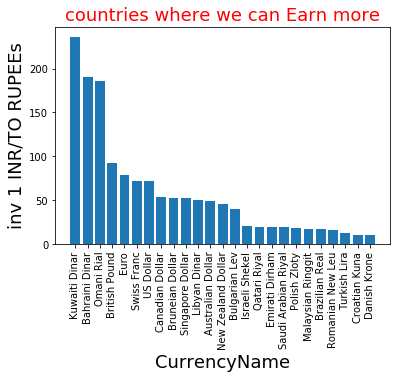

In [22]:
x=IRUP['CurrencyName']
y=IRUP['inv 1 INR']
plt.bar(x, y)
plt.title('countries where we can Earn more',fontsize=18,color='red')
plt.xlabel('CurrencyName',fontsize=18)
plt.ylabel('inv 1 INR/TO RUPEEs',fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

In [18]:
Rupee.to_csv('CURRENCY_ExchangeRates.csv')